### ------------ Plan --------------------
#### 1. Présentation
#### 2. Liste des fonctions
#### 3. Tests et affichages


### ------------ Présentation ------------

In [ ]:
# Bibliothèques #
from numpy import *
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import operator
import collections

from math import *
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import plotly.plotly as py

### ------------ Fonctions ------------

In [2]:
def liste_periode(n, a):    #Pour une image de taille n
    M = np.zeros([n, n]) #Créé une matrice de zéros
    L = []               #Liste de période des pixels
    N = 1
    while N < n**2:           #Tant que tout les pixels ne sont pas traités
        x, y = case_nulle(M)  #Cherche un pixel qui n'a pas été traité
        T = 1
        M[x,y] = 1            #A chaque pixel traité, on met un 1 à son emplacement
        i, j = ((x*a)+(y*(a+1)))%n, (((a-1)*x) + (a*y))%n #Applique la fonction phi sur le pixel
        while  i!=x or j!=y:      #Tant qu'on n'est pas revenu à sa place initiale
            T = T + 1             #Incrémente la période du pixel
            M[i,j] = 1            #A chaque pixel traité, on met un 1 à son emplacement
            i, j = ((i*a)+(j*(a+1)))%n, (((a-1)*i) + (a*j))%n #Applique la fonction phi sur le pixel
        L.append(T)    #Ajoute la période à la lite des périodes
        N = N + T      #Ajoute le nombre de pixels traités
    return L

In [3]:
def case_nulle(M):
    x = 0  #Initialise à 0 l'indice de ligne
    y = 0  #Initialise à 0 l'indice de colonne
    n = len(M[0]) #Cherche la dimension de la matrice
    while M[x,y] == 1: #Tant qu'on est sur un pixel déjà traité
        if y+1 < n:
            y = y + 1  #Incrémente l'indice de colonne
        else:
            y = 0      #Sinon remet l'indice de colonne à 0
            x = x + 1  #Et incrémente l'indice de ligne
    return (x, y)      #Retourne la position du pixel non traité

In [4]:
def PGCD(a, b):
    c = max(a, b)
    d = min(a, b)
    while d != 0:
        c, d = d, c%d
    return c

In [5]:
def PPCM(a, b):
    return((a*b)/PGCD(a,b))

In [6]:
def PPCM_liste(L):
    ppcm = 1
    for elem in L:
        ppcm = PPCM(ppcm, elem)
    return ppcm

In [7]:
def periode(n, a):
    return(PPCM_liste(liste_periode(n, a)))

In [8]:
def fct_maj(n, a):
    m=0
    for k in range (1, n+1):
        m=max(m,periode(k, a)/k)
    return(m)

In [9]:
# n: nombre de périodes
# m: borne maximale de notre générateur
# a: graine pour générer la matrice de transformation
def liste_random(n, m, a):
    Lx    = range(int(sqrt(m)), n+1)
    Ly    = []
    coef  = fct_maj(n,a)
    for k in range (int(sqrt(m)), n+1):
        p   = periode(k, a)
        ord = (p * k) % m
        Ly.append(int(ord))
    return Lx, Ly

In [10]:
def contingence_periodes(L):
    C          = dict() # Dictionnaire de contingence
    C_sort     = dict() # Dictionnaire trié (sur la valeur de la periode pour l'instant)
    valeurs    = []     # Liste des valeurs trouvees
    occurences = []     # Nombre d'occurences de chaque valeur
    
    for i in L:
        if i in C:
            C[i] += 1
        else:
            C.update({i: 1}) # Creation d'une nouvelle entree dans le dico avec la clé de valeur L[i] et de valeur associée 1
            
    C_sort = sorted(C.items(), key=operator.itemgetter(0)) # Tri par ordre croissant sur la valeur
    
    # Separation de la contingence en 2 listes
    for item in C_sort:
        valeurs.append(item[0])
        occurences.append(item[1])
    
    return valeurs, occurences

In [11]:
def afficher_contingence(valeurs, occurences):
    proportion = int(len(valeurs) * 0.25)
    y_pos = np.arange(len(occurences))                   # Pour faire une liste à partir des index
    plt.rcParams['figure.figsize'] = [proportion + 3, 4] # Affichage adaptatif en largeur
    plt.bar(y_pos, occurences)
    plt.xticks(y_pos, valeurs)
    plt.show()

In [12]:
def afficher_repartition(Lx, Ly, a):
    lx = len(Lx)
    ly = len(Ly)
    
    print(lx, ly)
    print(ly / lx)
    
    for i in range(1, int(ly / lx) ):
        plt.plot(Lx, Ly[lx * i : lx * 2 * i ], 'ro')
        
    #coef  = fct_maj(len(Lx), a)
    plt.show()

### ------------ Tests  ------------

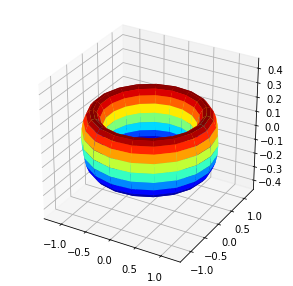

In [34]:
fig   = plt.figure()
ax    = fig.add_subplot(111, projection='3d')

plt.rcParams['figure.figsize'] = [10, 7]

nbPts = 20
theta = np.linspace(0, 2 * np.pi, nbPts)
phi   = np.linspace(0, 2 * np.pi, nbPts)

X     = np.outer((1 + 0.2 * np.cos(phi)), np.cos(theta))
Y     = np.outer((1 + 0.2 * np.cos(phi)), np.sin(theta))
Z     = np.outer(np.sin(phi), 0.2 * np.ones(nbPts))

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap=cm.jet)
ax.set_zlim3d(-0.45,0.45)
plt.show()

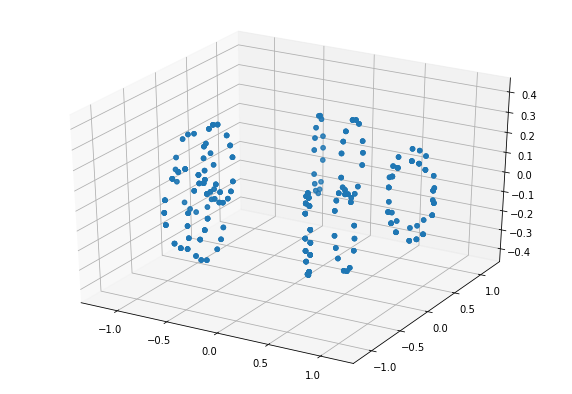

In [35]:
def trajectoire_3d(a, b, n):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x0=a
    y0=b
    Lx=[x0]
    Ly=[y0]
    xk=(x0+y0)%n
    yk=(x0+2*y0)%n
    while (xk != x0) or (yk != y0):
        Lx.append(xk)
        Ly.append(yk)
        xk, yk=(xk+yk)%n, (xk+2*yk)%n
    theta = [2*pi*k/n for k in Lx]
    phi = [2*pi*k/n for k in Ly] 
    X = np.outer((1 + 0.2 * np.cos(phi)), np.cos(theta))
    Y = np.outer((1 + 0.2 * np.cos(phi)), np.sin(theta))
    Z = np.outer(np.sin(phi), 0.2 * np.ones(np.size(theta)))
    ax.scatter(X, Y, Z)
    ax.set_zlim3d(-0.45,0.45)
    plt.show()

trajectoire_3d(5, 4, 20)

In [36]:
n      = 100                 # Paramètres des tests
m      = 100
a      = 4  
Lx     = []
Ly     = []
# Lx, Ly = liste_random(n, m, a)   

In [40]:
### Création du jeu de valeurs ###

Ly = []
for a in range(3, 333, 10): # a = 3, 13, 23, 33 .... 103
    x, y   =  liste_random(n, m, a)    
    Ly.extend(y)


# TODO #

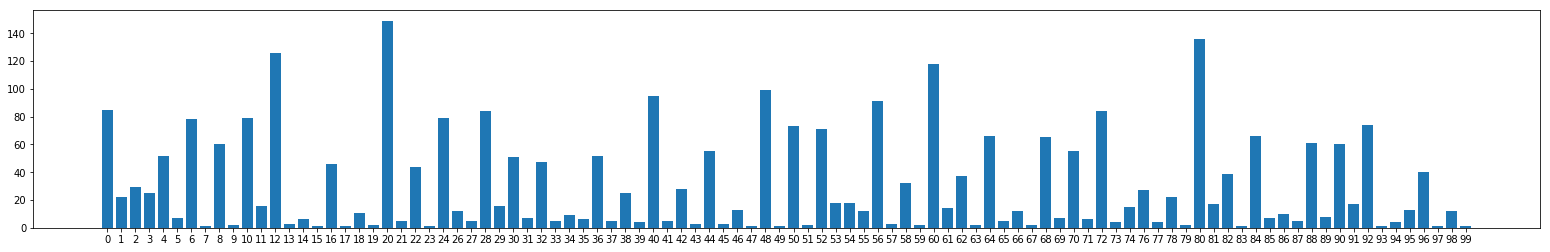

In [41]:
### CONTINGENCE ###
valeurs, occurences = contingence_periodes(Ly)
afficher_contingence(valeurs, occurences)

91 3003
33.0


ValueError: x and y must have same first dimension, but have shapes (91,) and (182,)

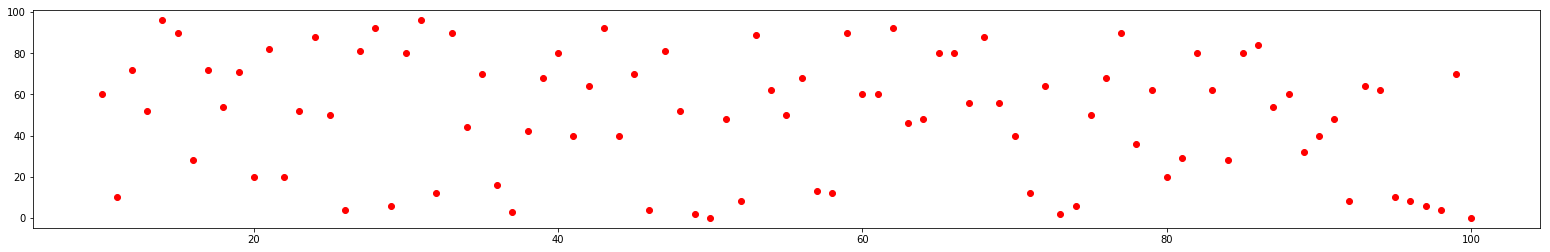

In [42]:
### RÉPARTITION ###
Lx = x
afficher_repartition(Lx, Ly, a)